# Parkinson's Disease Dataset
Attribute Information:
----------------------
Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,

MDVP:Shimmer(dB),

Shimmer:APQ3,

Shimmer:APQ5,

MDVP:APQ,

Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

# Importing Libraries

In [2]:
#Importing Libraries for ML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import ttest_ind

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_classif

import warnings
warnings.filterwarnings("ignore")


# Importing Data

In [3]:
df = pd.read_csv('parkinsons_disease_data.csv')
df.head(3)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


# Data Cleaning
### 1. Missing Value.
### 2. Duplicates.
### 3. Outliers.
### 4. Categorical Value

In [4]:
df.iloc[:3,:10]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233


In [5]:
df.iloc[:3,:14]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590


In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,194.000000,195.000000,195.000000,195.000000,193.000000,193.000000,192.000000,193.000000,193.000000,...,194.000000,195.000000,193.000000,195.000000,195.000000,195.000000,194.000000,195.000000,195.000000,195.000000
mean,154.279292,197.050314,115.650154,0.006201,0.000044,0.003301,0.065575,0.009913,0.029630,0.286648,...,0.047070,0.024722,21.854953,0.748718,0.497949,0.718091,-5.704476,0.225424,2.378295,0.205758
std,41.332159,91.765968,44.218456,0.004844,0.000035,0.002980,0.863537,0.008947,0.018964,0.202413,...,0.030471,0.040413,4.403596,0.434867,0.103282,0.055342,1.071189,0.082552,0.384316,0.089375
min,88.333000,102.145000,1.000000,0.001680,0.000007,0.000680,0.000000,0.002040,0.009540,0.085000,...,0.014030,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.337250,84.016500,0.003460,0.000020,0.001660,0.001860,0.004987,0.016440,0.149000,...,0.024872,0.005925,19.200000,0.500000,0.421306,0.674295,-6.451077,0.174351,2.092837,0.137451
50%,148.790000,174.402000,104.095000,0.004940,0.000030,0.002500,0.002670,0.007455,0.022930,0.221000,...,0.038335,0.011660,22.066000,1.000000,0.495954,0.722254,-5.722462,0.218037,2.359973,0.194052
75%,182.769000,224.317250,137.015500,0.007300,0.000055,0.003800,0.003900,0.011250,0.038100,0.361000,...,0.060883,0.025070,25.032000,1.000000,0.584666,0.761881,-5.119417,0.275980,2.636456,0.252188
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,12.000000,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
df.shape

(195, 24)

# 1. Missing values

In [8]:
class missing_values_handler():
    
    def __init__(self, df):
        self.df = df
        self.nulls_in_row_df = None
        self.deleted_rows_df = None
        
        self.null_in_col_df = None
        self.deleted_cols_df = None
        
    def find_columnwise_na(self):
        """
        Find out the columns and respective null value ounts and its percentage with respect to total number of records.
        """
        # creating the data frame with column name and respective null count
        null_in_col_df = self.df.isnull().sum()
        null_in_col_df = pd.DataFrame({"Columns Name":null_in_col_df.index, "Number of NA in Column":list(null_in_col_df)})
        null_in_col_df["Percentage"] = round(null_in_col_df["Number of NA in Column"]*100/len(self.df), 2)
        
        # sorting the data frame
        null_in_col_df = null_in_col_df.sort_values("Number of NA in Column", ascending=False)
        
        # saving the data
        self.null_in_col_df = null_in_col_df
        return null_in_col_df
    
    
    def delete_cols_above_threashold_na(self, threashold, inplace):
        """
        Find the columns in dataframe with na count higher than threashold and delete them
        """
        # create dataframe with cols and na count
        self.find_columnwise_na()
        
        # find the columns having higher count than threashold
        cols = list(self.null_in_col_df[self.null_in_col_df["Percentage"]>threashold]["Columns Name"])
        
        # delete the columns
        deleted_cols_df = self.df.drop(cols, axis=1)
        
        # saving data
        self.deleted_cols_df = deleted_cols_df
        if inplace:
            self.df = deleted_cols_df
            
        return deleted_cols_df
        
    # Lets findout the rows having maximum number of columns with NA value
    def find_rowwise_na(self):
        """
        Find out the number of columns having NA values for a rows, so that rows having more number of NA valued columns can be deleted.
        """

        df_isnull = self.df.isnull()
        nulls_in_row_dict = {}

        # calculate the number of columns having null value
        for index, row in df_isnull.iterrows():
            nulls_in_row_dict[index] = sum(row)

        # form a dataframe
        nulls_in_row_df = pd.DataFrame({"Row number": nulls_in_row_dict.keys(), 
                                        "Number of columns having NA": nulls_in_row_dict.values()}, index=None)

        # find percentage of columns having 0 value for given rows and sort
        nulls_in_row_df["Percentage"] =  round(nulls_in_row_df["Number of columns having NA"]/len(df_isnull.columns), 2)*100
        nulls_in_row_df = nulls_in_row_df.sort_values("Number of columns having NA", ascending=False)
        
        self.nulls_in_row_df = nulls_in_row_df
        return nulls_in_row_df
    
    
    
    # delete the rows based on the given number of threashold percentage, row will be deleted for which number of columns having missing values is higher than given threashold value 
    def delete_rows_above_threashold_na(self, threashold, inplace):
        """
        Delete the rows having more number of NA values than specified threashold
        """
        # find rows above threashold number of na
        rows_numbers = self.nulls_in_row_df[self.nulls_in_row_df["Percentage"]>threashold]["Row number"]
        rows_numbers = list(rows_numbers)
        
        # delete the rows
        deleted_rows_df = self.df.drop(index=rows_numbers)
        
        # save changes
        self.deleted_rows_df = deleted_rows_df
        
        if inplace:
            self.df = deleted_rows_df
            
        return deleted_rows_df
    
    
    
    
missing_handler = missing_values_handler(df)

In [9]:
# Find out the missing values in each column
missing_handler.find_columnwise_na()

,Columns Name,Number of NA in Column,Percentage
8,Jitter:DDP,3,1.54
16,HNR,2,1.03
6,MDVP:RAP,2,1.03
7,MDVP:PPQ,2,1.03
9,MDVP:Shimmer,2,1.03
10,MDVP:Shimmer(dB),2,1.03
12,Shimmer:APQ5,1,0.51
2,MDVP:Fhi(Hz),1,0.51
20,spread1,1,0.51
13,MDVP:APQ,1,0.51


In [10]:
# Find row wise missing values e.g. rows having missing values and there count of columns for which it is missing
missing_handler.find_rowwise_na()

,Row number,Number of columns having NA,Percentage
58,58,8,33.0
108,108,3,12.0
77,77,2,8.0
25,25,1,4.0
81,81,1,4.0
...,...,...,...
69,69,0,0.0
70,70,0,0.0
71,71,0,0.0
72,72,0,0.0


<Axes: >

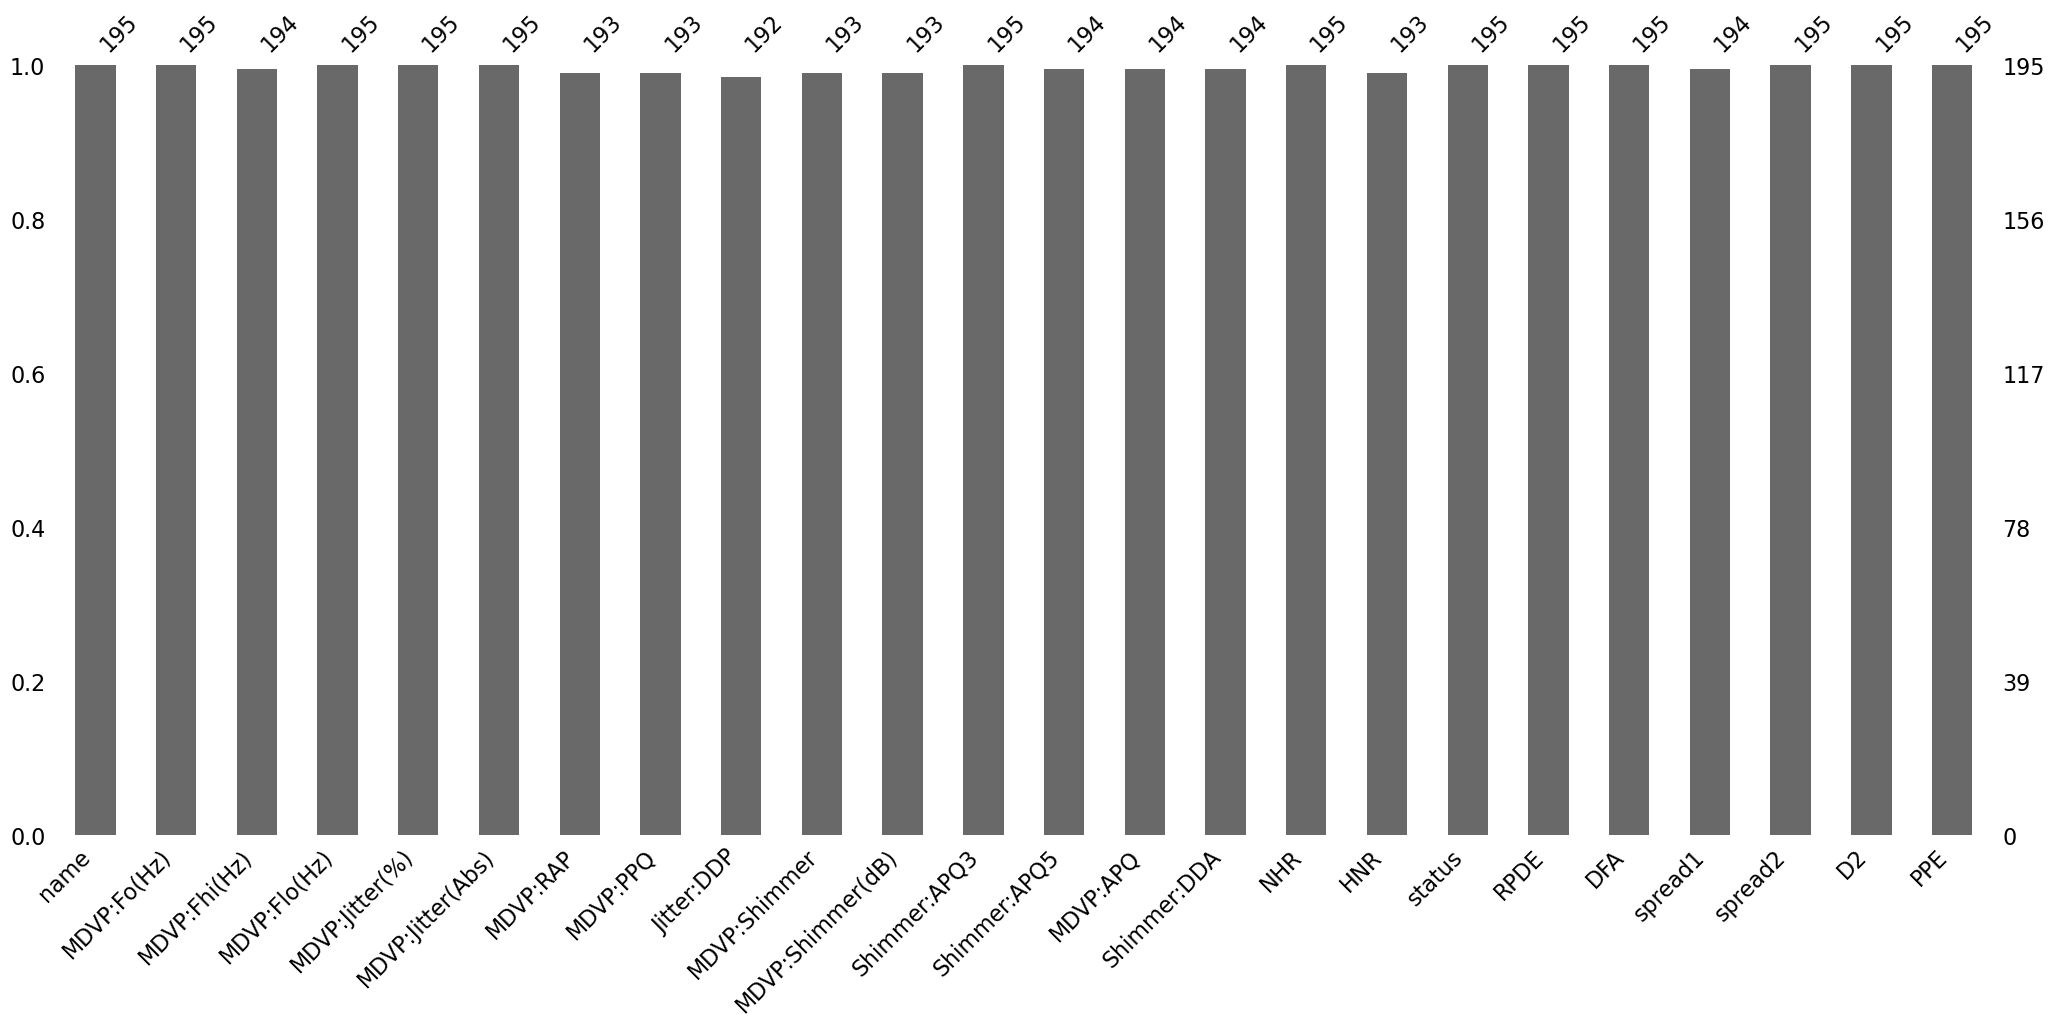

In [11]:
#Showing the barchart of missing values
msno.bar(df)

<Axes: >

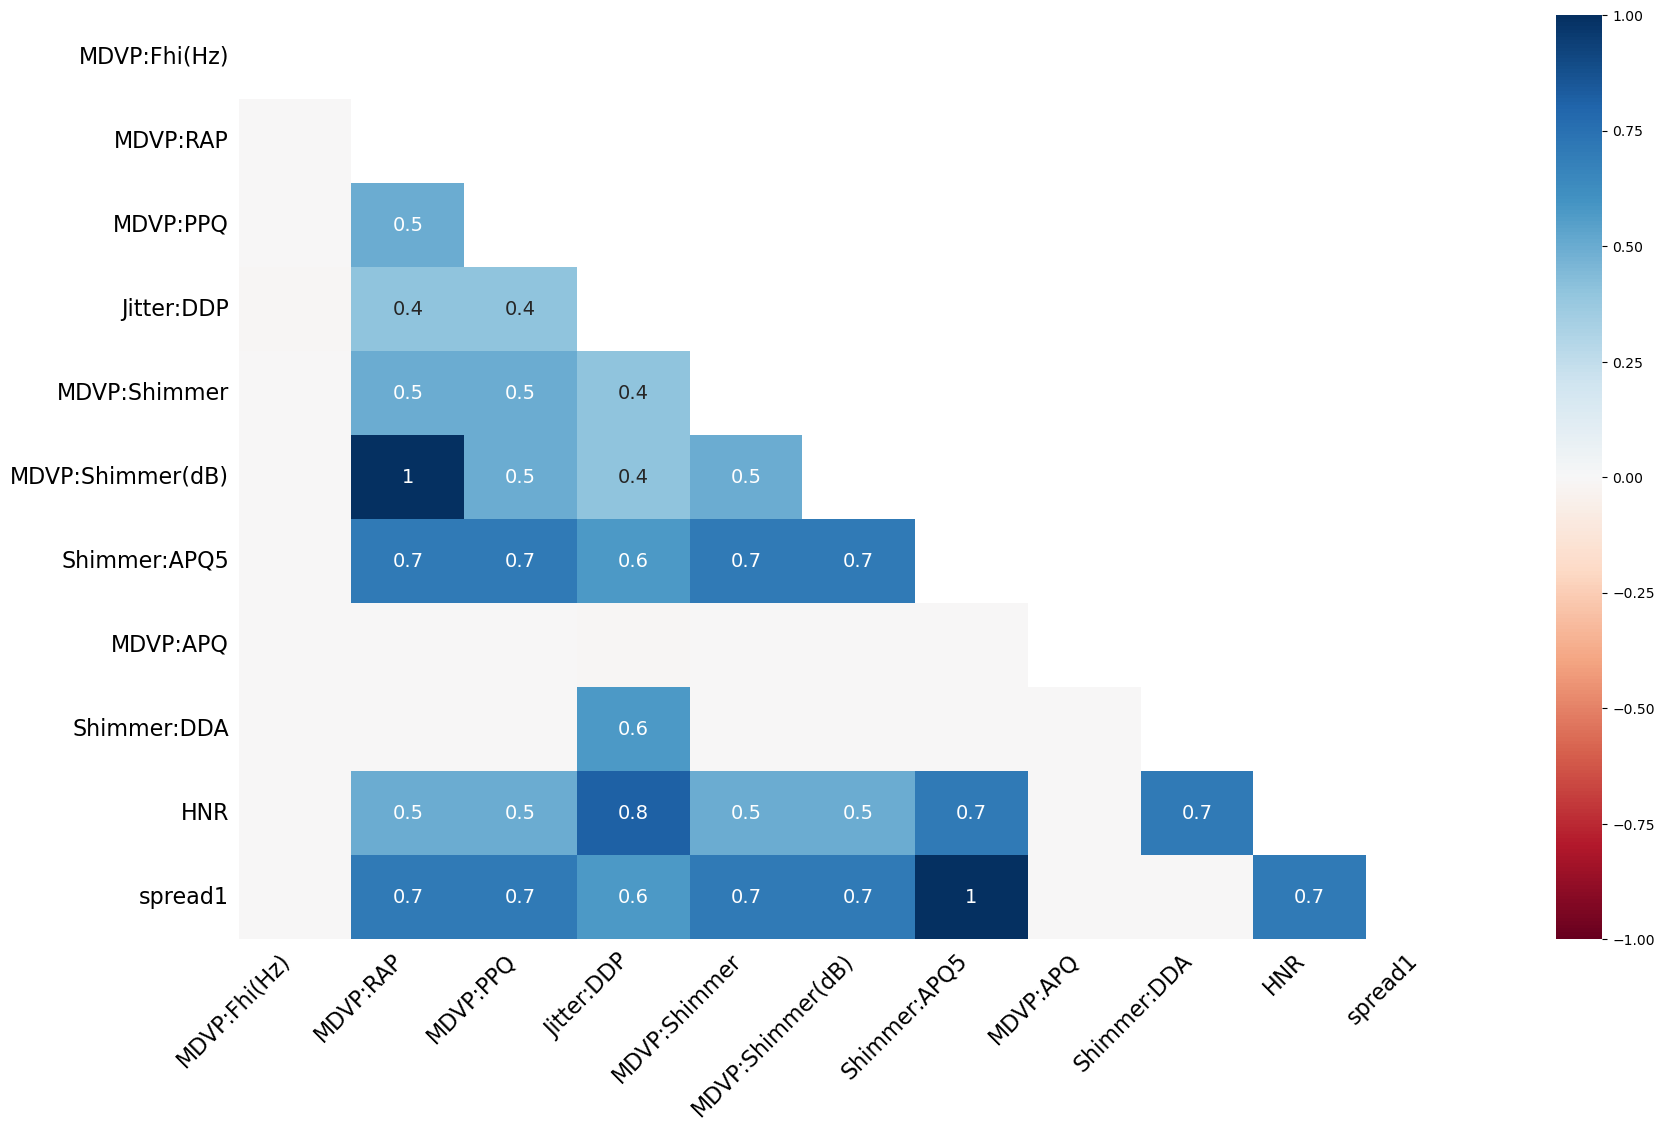

In [12]:
# Showing the heatmap of missing values
msno.heatmap(df)

<Axes: >

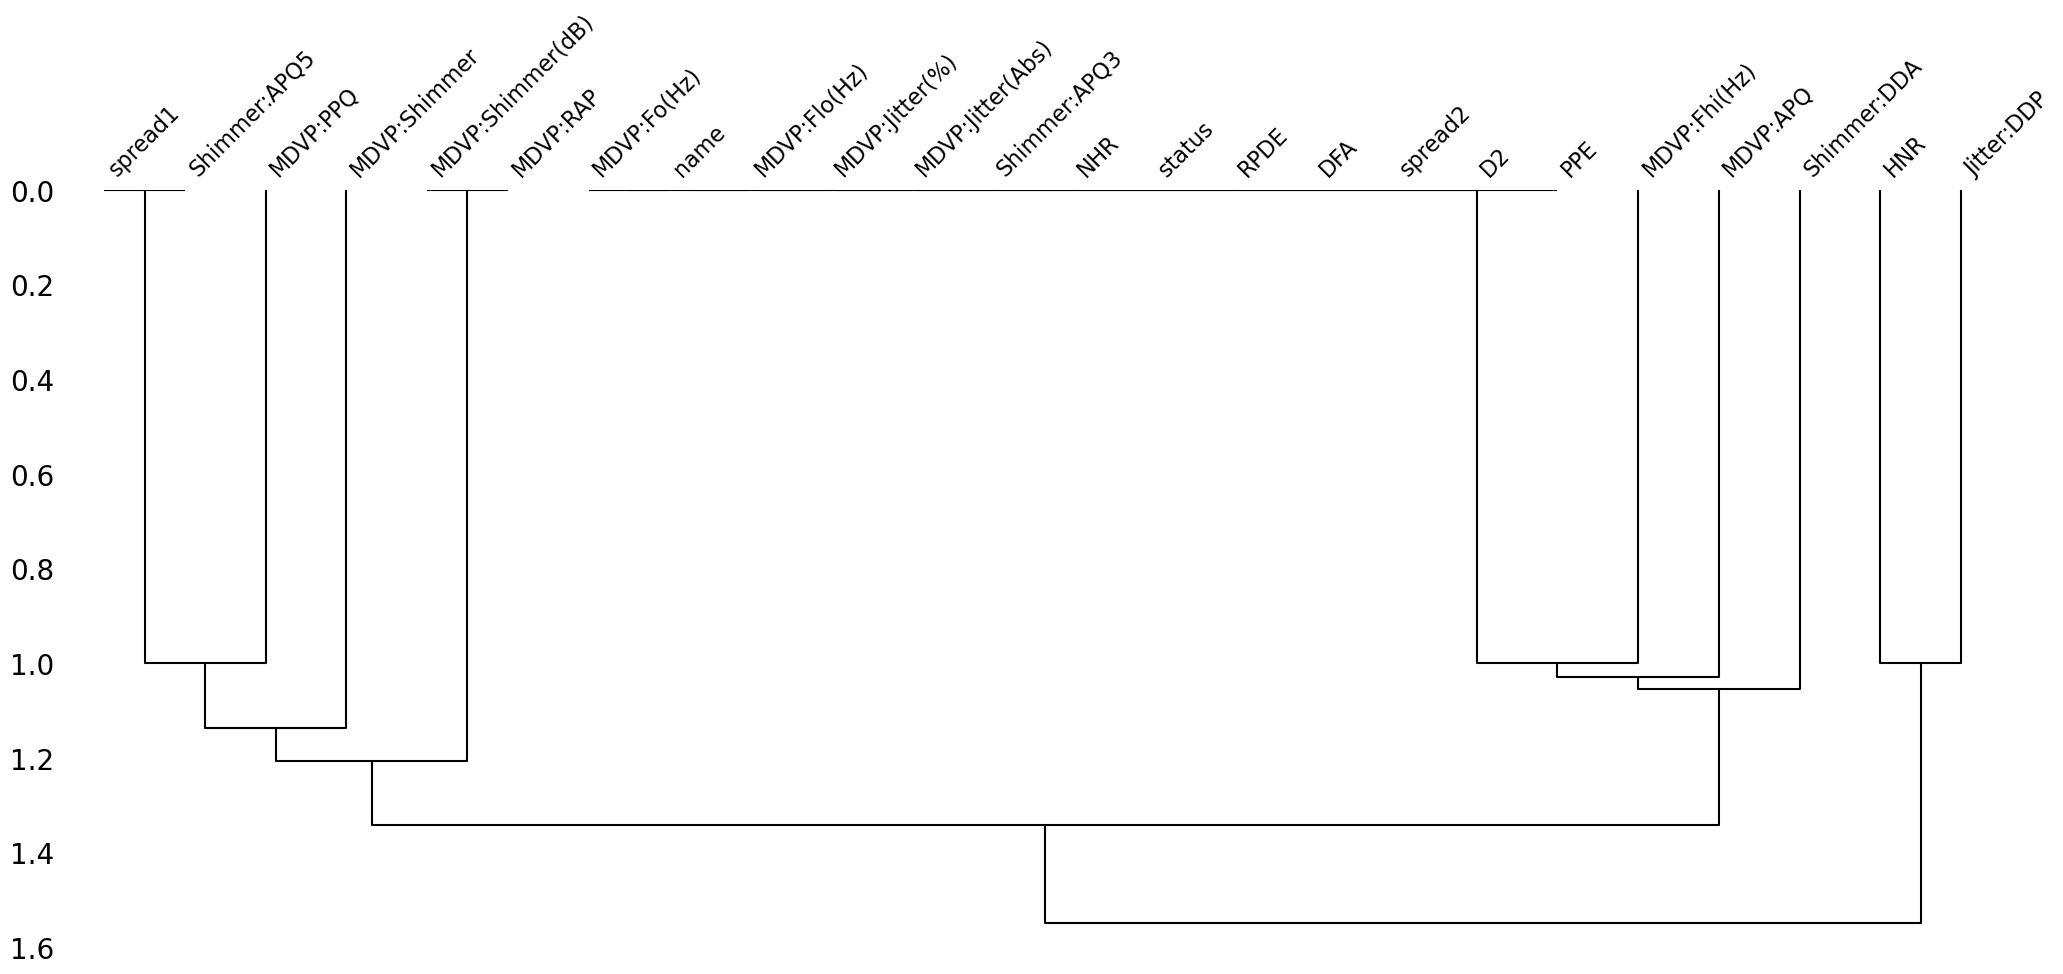

In [13]:
# Showing the dendrogram for missing values
msno.dendrogram(df)

<Axes: >

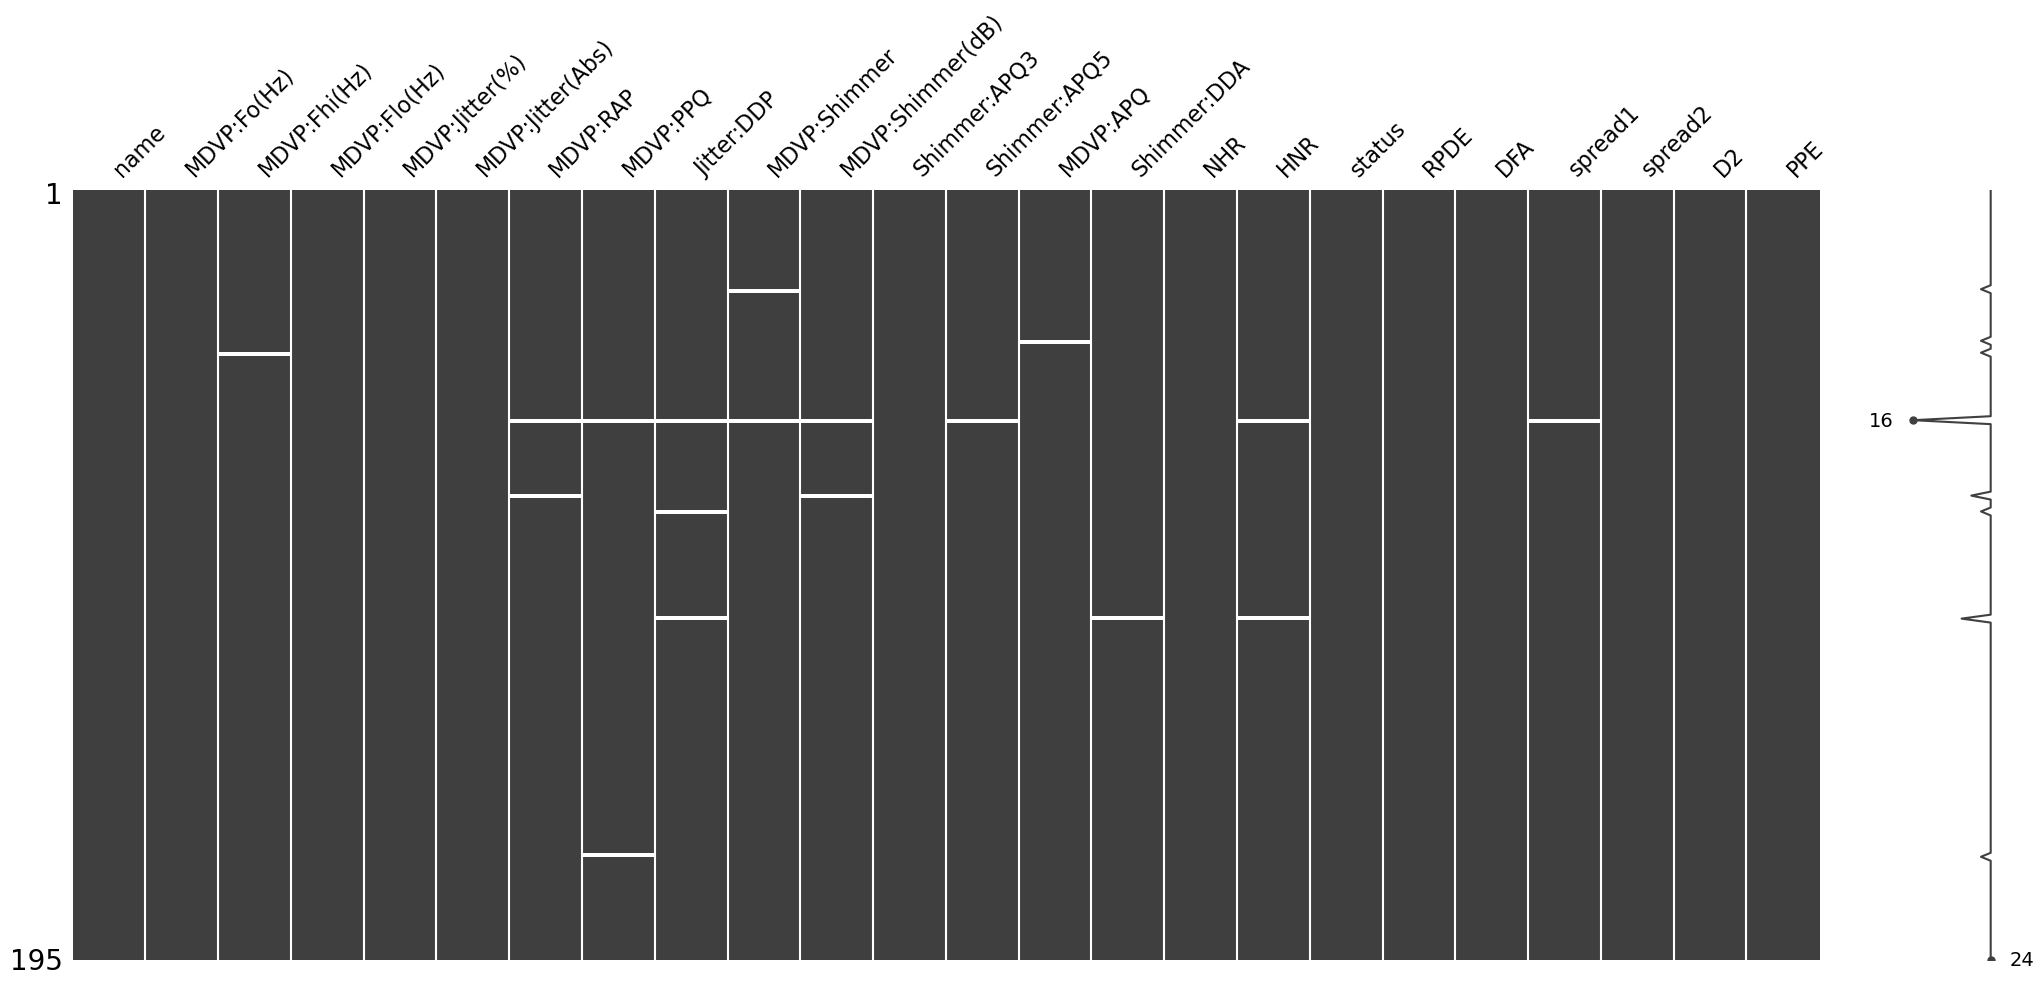

In [14]:
# Showing the matrix of columns for missing values
msno.matrix(df)

---------------------------------------

## From above analysis it can be concluded below details - 

1. MDVP:RAP, 'spread1', 'Shimmer:APQ5', 'HNR', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)' columsn have null value at one row which can be deleted completely as this row will not contribute to the insights much


2. Row no. 58, 108 and 77 have 33%, 12% and 8% missing values hence this rows can be deleted.


3. Jitter:DDP, HNR, MDVP:RAP, MDVP:PPQ, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ5, MDVP:Fhi(Hz), spread1 , MDVP:APQ, Shimmer:DDA are having 1 to 3 missing values 


4. As many columns are having missing values we will input themissing values based on KNN imputer

5. As per the heatmap of the missing values it can be seen that there is correlation between the missing ness of the values


### Deleting the Missing Values

In [15]:
# Lets delete the rows where more than 5% columns are having missing values and create new data frame
df_null_removed = missing_handler.delete_rows_above_threashold_na(5, False)
df_null_removed.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [16]:
# Find row wise missing values e.g. rows having missing values and there count of columns for which it is missing
missing_handler = missing_values_handler(df_null_removed)
missing_handler.find_rowwise_na()

,Row number,Number of columns having NA,Percentage
25,25,1,4.0
41,41,1,4.0
165,168,1,4.0
79,81,1,4.0
38,38,1,4.0
...,...,...,...
67,68,0,0.0
68,69,0,0.0
69,70,0,0.0
70,71,0,0.0


In [17]:
# Hence rows having more than 5% columns as null are removed

### Imputing the Missing Value

#### As data is having only numerical data and as per the heatmap we can see the correlation between the columns. Hence lets impute the missing values based on KNN imputation methods

In [18]:
# Lets create function which takes the data and select numerical columns and impute the data based on KNN algorithm and return the data with imputed values

def knn_imputer(df):
    
    # Select numerical columns
    numerical_cols = df.select_dtypes(include='number').columns
    
    # Initialize KNNImputer
    imputer = KNNImputer()
    
    # Impute numerical columns
    df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
    
    return df


# Lets have the imputed data after KNN imputaton
df_imputed = knn_imputer(df_null_removed)

In [19]:
# Lets check the missing values in the data after imputation
missing_handler = missing_values_handler(df_imputed)
missing_handler.find_columnwise_na()

,Columns Name,Number of NA in Column,Percentage
0,name,0,0.0
1,MDVP:Fo(Hz),0,0.0
22,D2,0,0.0
21,spread2,0,0.0
20,spread1,0,0.0
19,DFA,0,0.0
18,RPDE,0,0.0
17,status,0,0.0
16,HNR,0,0.0
15,NHR,0,0.0


In [20]:
df_imputed.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# 2. Duplicate Check

### Lets check if rows are duplicated by removing the Status and Name column

In [21]:
def check_duplicates_subcolumns(df, subcolumns):
    # Check for duplicates within specified subcolumns of a DataFrame.
 
    # Create a subset DataFrame containing only the specified subcolumns
    subset_df = df[subcolumns]

    # Check for duplicates within the subset DataFrame
    duplicates = df[subset_df.duplicated(keep=False)]

    return duplicates

df_imputed.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [22]:
# Checking the duplicates without the status column and index column as status column can bedifferent as it is showing the dependant variable
# Index column will have unique value for sure hence this also will not consider for duplciates
# Hence we will drop status and name column from duplicate check

check_duplicates_subcolumns(df_imputed, ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR','RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'])

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
163,phon_R01_S39_5,112.15,131.669,97.527,0.00519,0.00005,0.00291,0.00284,0.00873,0.01756,...,0.02902,0.01435,21.219,1.0,0.557045,0.673086,-5.617124,0.184896,1.871871,0.212386
164,phon_R01_S39_6,112.15,131.669,97.527,0.00519,0.00005,0.00291,0.00284,0.00873,0.01756,...,0.02902,0.01435,21.219,0.0,0.557045,0.673086,-5.617124,0.184896,1.871871,0.212386


In [23]:
# As we found that duplicate is found in the dataframe we will drop the row index 163
df_unique = df_imputed.drop(163)

In [24]:
# Lets check if duplicate row deleted
check_duplicates_subcolumns(df_unique, ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR','RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'])

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


### Hence duplicates are removed

# 3. Outliers

In [25]:
def plot_distribution(df, col):
    fig, ax =plt.subplots(1,2)
    plt.figure(figsize=(40,10))
    sns.distplot(df[col], ax=ax[0])  
    df.boxplot(column=col, ax=ax[1])
    plt.show()

def find_outliers_normal(data, col):
    upper_bound = data[col].mean() + 3*data[col].std()
    lower_bound = data[col].mean() - 3*data[col].std()

    upper_outliers = len(data.loc[data[col]>upper_bound])
    lower_outliers = len(data.loc[data[col]<lower_bound])
    
    print("Outliers in '",col,"' Column")
    print("Upper Bound - ",upper_bound)
    print("Lower Bound - ",lower_bound)
    print("Number of Upper Outliers - ",upper_outliers)
    print("Number of Lower Outliers - ",lower_outliers)
    print("")
    
def find_outliers_skewed(df, col):
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    
    upper_bound = df[col].quantile(0.75) + (IQR*1.5)
    lower_bound = df[col].quantile(0.25) - (IQR*1.5)
    
    upper_outliers = len(df.loc[df[col]>upper_bound])
    lower_outliers = len(df.loc[df[col]<lower_bound])
    
    
    print("Outliers in '",col,"' Column")
    print("Upper Bound - ",upper_bound)
    print("Lower Bound - ",lower_bound)
    print("Number of Upper Outliers - ",upper_outliers)
    print("Number of Lower Outliers - ",lower_outliers)
    print("")


def remove_outliers_normal(df, col, threshold):
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    df = df[(z_scores.abs() < threshold)]
    
    return df

def remove_outliers_skewed(df, col):
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    
    upper_bridge = df[col].quantile(0.75) + (IQR*1.5)
    lower_bridge = df[col].quantile(0.25) - (IQR*1.5)
    
    df.loc[df[col]>=upper_bridge, col] = upper_bridge
    df.loc[df[col]<=lower_bridge, col] = lower_bridge
    
    return df

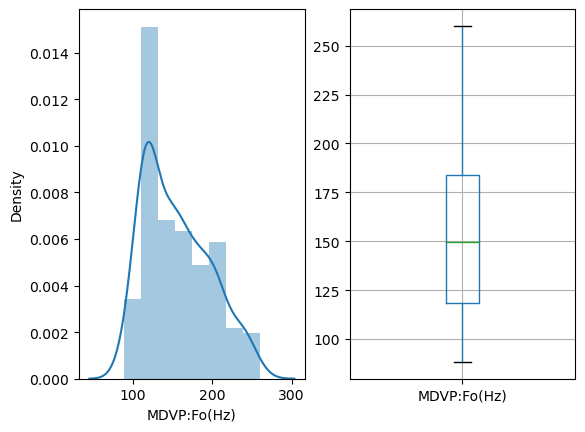

<Figure size 4000x1000 with 0 Axes>

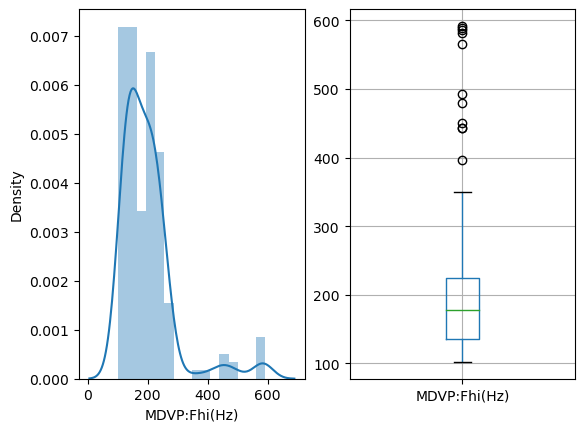

<Figure size 4000x1000 with 0 Axes>

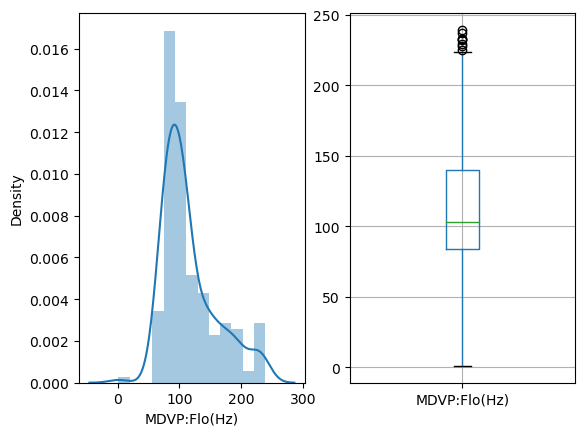

<Figure size 4000x1000 with 0 Axes>

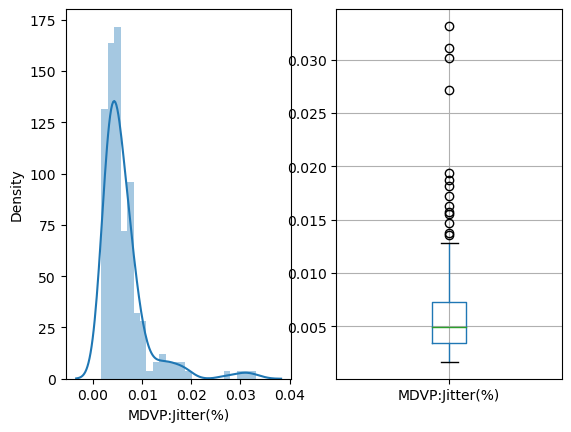

<Figure size 4000x1000 with 0 Axes>

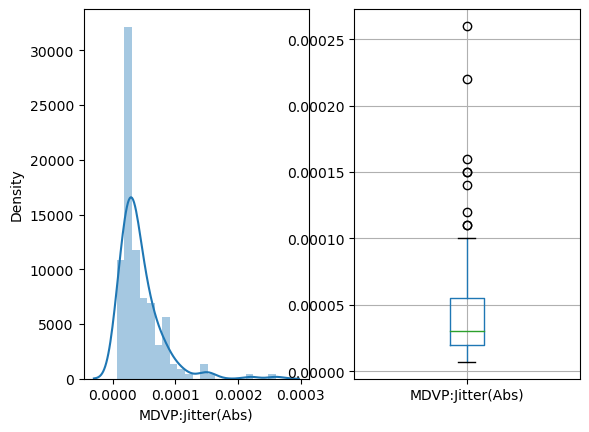

<Figure size 4000x1000 with 0 Axes>

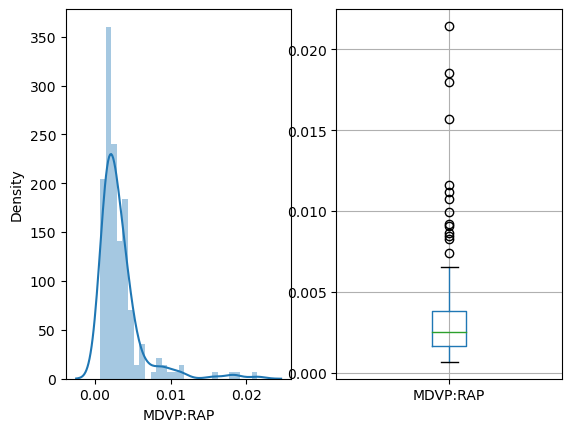

<Figure size 4000x1000 with 0 Axes>

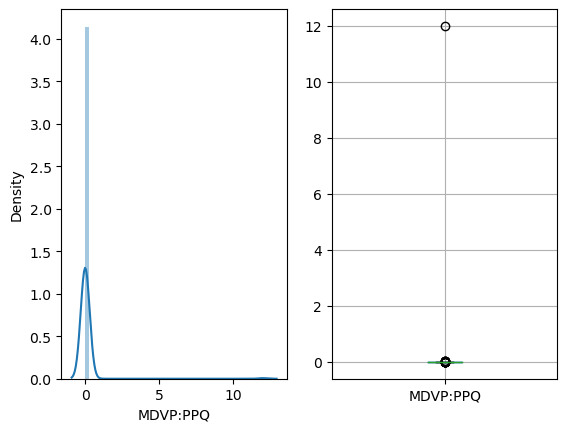

<Figure size 4000x1000 with 0 Axes>

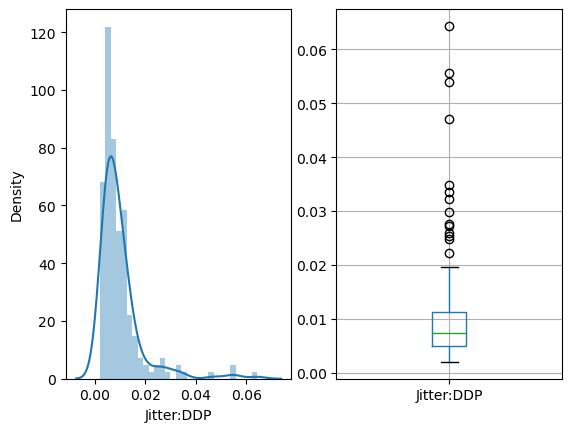

<Figure size 4000x1000 with 0 Axes>

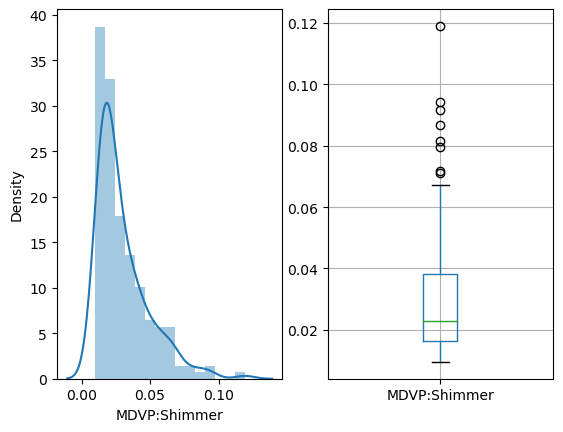

<Figure size 4000x1000 with 0 Axes>

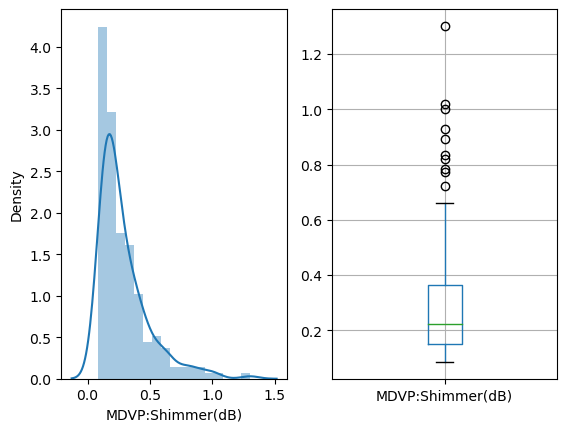

<Figure size 4000x1000 with 0 Axes>

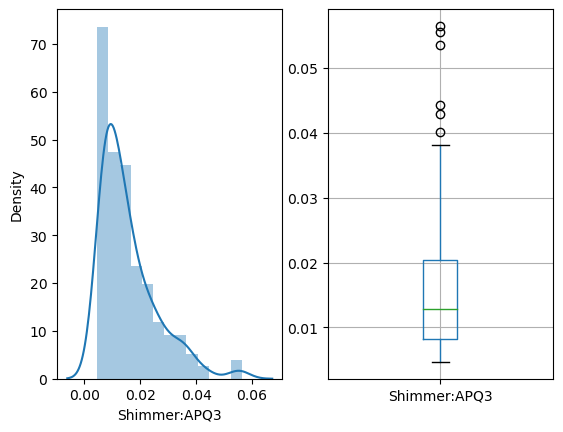

<Figure size 4000x1000 with 0 Axes>

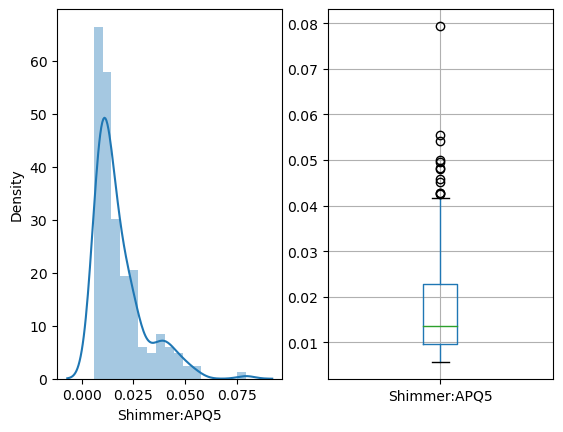

<Figure size 4000x1000 with 0 Axes>

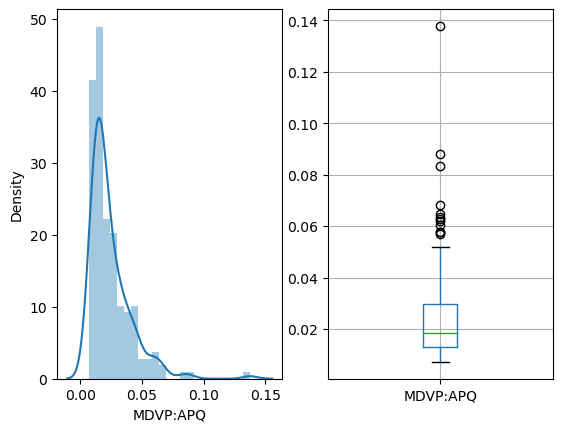

<Figure size 4000x1000 with 0 Axes>

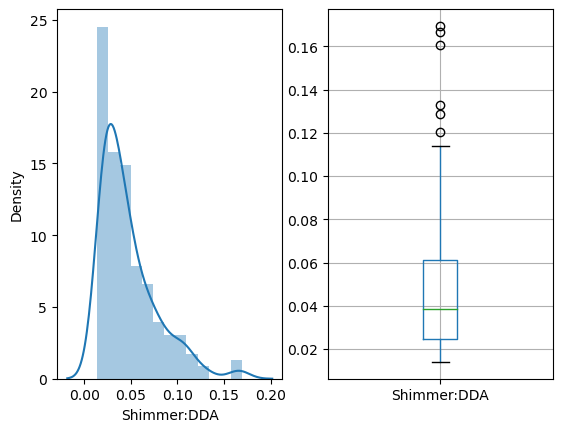

<Figure size 4000x1000 with 0 Axes>

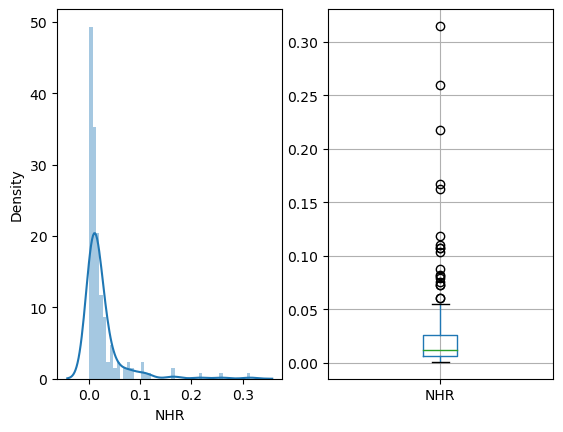

<Figure size 4000x1000 with 0 Axes>

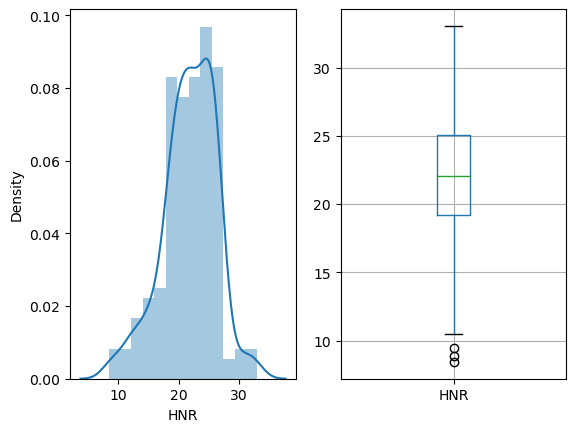

<Figure size 4000x1000 with 0 Axes>

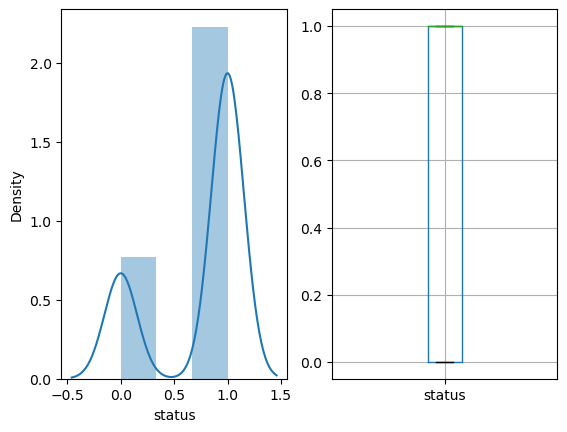

<Figure size 4000x1000 with 0 Axes>

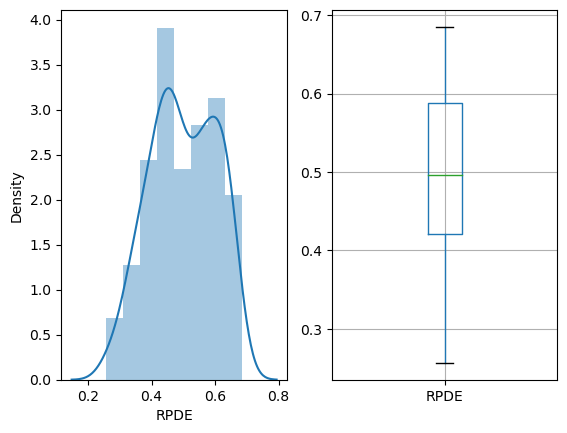

<Figure size 4000x1000 with 0 Axes>

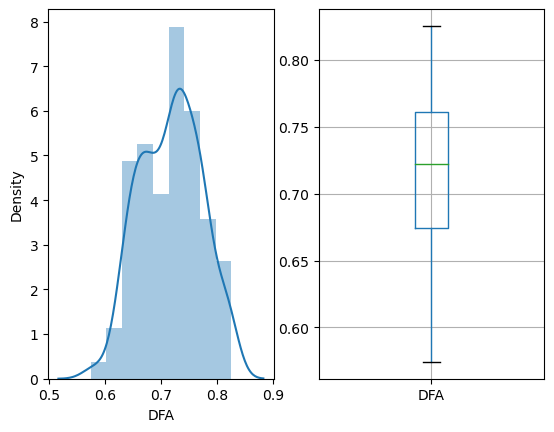

<Figure size 4000x1000 with 0 Axes>

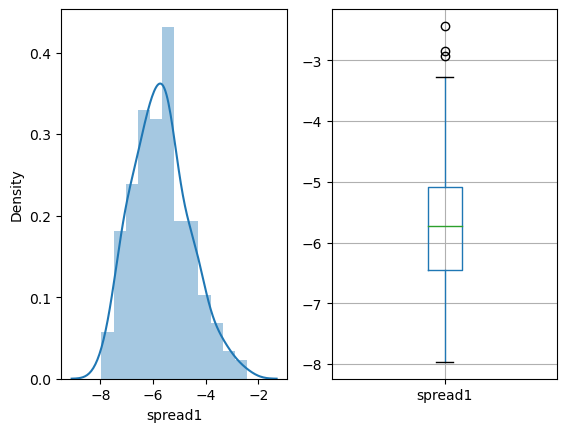

<Figure size 4000x1000 with 0 Axes>

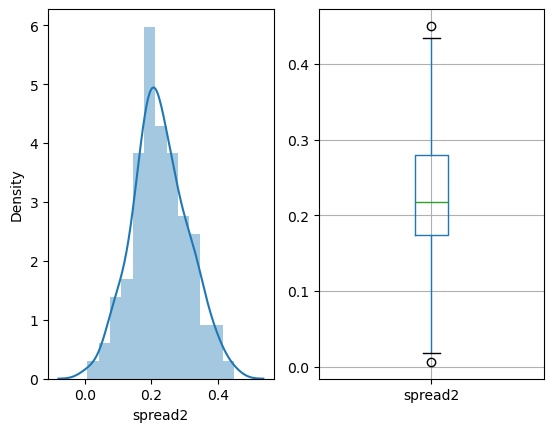

<Figure size 4000x1000 with 0 Axes>

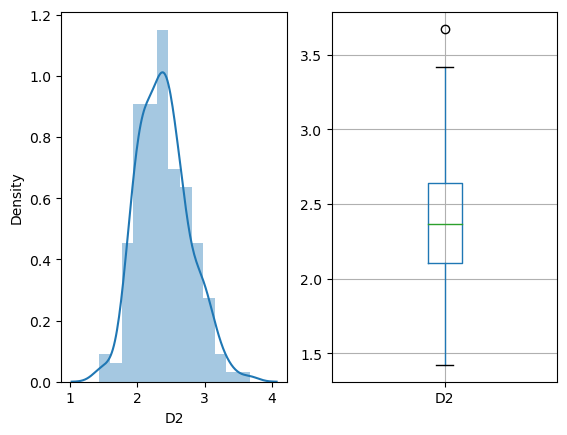

<Figure size 4000x1000 with 0 Axes>

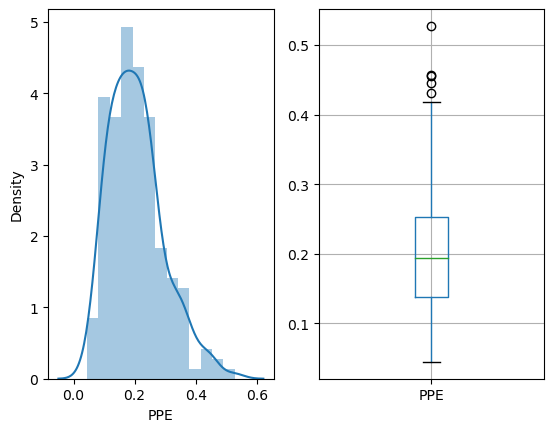

<Figure size 4000x1000 with 0 Axes>

In [26]:
# Select numerical columns
feature_list = df_unique.select_dtypes(include='number').columns

# Plot the histograms and boxplots to see the outliers for all numerical variable 
for feature in feature_list:
    plot_distribution(df_unique, feature)

In [27]:
df_unique.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [28]:
normally_dist_features = ['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'HNR', 'status', 'RPDE', 'DFA',
                        'spread1', 'spread2', 'D2', 'PPE']

skewed_dist_features = ['MDVP:Fhi(Hz)',  'MDVP:Jitter(%)','MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR',
       'MDVP:Jitter(Abs)',]

In [29]:
# Normally distributed features
print("Outliers before")
for feature in normally_dist_features:
    find_outliers_normal(df_unique, feature)

Outliers before
Outliers in ' MDVP:Fo(Hz) ' Column
Upper Bound -  279.24991681656553
Lower Bound -  30.623130303853316
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' MDVP:Flo(Hz) ' Column
Upper Bound -  249.65050222867356
Lower Bound -  -18.169643589930132
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' HNR ' Column
Upper Bound -  35.08876458904097
Lower Bound -  8.586282531377876
Number of Upper Outliers -  0
Number of Lower Outliers -  1

Outliers in ' status ' Column
Upper Bound -  2.0570761955522583
Lower Bound -  -0.5701652007878601
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' RPDE ' Column
Upper Bound -  0.8084312494377572
Lower Bound -  0.18907817464601234
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' DFA ' Column
Upper Bound -  0.8820772830136214
Lower Bound -  0.5529898792900438
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' spread1 ' Co

In [30]:
# Remove outliers in normally distributed features
df_outliers = df_unique
for feature in normally_dist_features:
    df_outliers = remove_outliers_normal(df_outliers, feature, 3)

In [31]:
print("Outliers after")
for feature in normally_dist_features:
    find_outliers_normal(df_outliers, feature)

Outliers after
Outliers in ' MDVP:Fo(Hz) ' Column
Upper Bound -  279.1808821345446
Lower Bound -  30.029139029476525
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' MDVP:Flo(Hz) ' Column
Upper Bound -  249.26666611812664
Lower Bound -  -18.655544425004948
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' HNR ' Column
Upper Bound -  34.76638187745257
Lower Bound -  9.155946164875472
Number of Upper Outliers -  0
Number of Lower Outliers -  1

Outliers in ' status ' Column
Upper Bound -  2.0589170007614834
Lower Bound -  -0.5774355192800023
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' RPDE ' Column
Upper Bound -  0.8069924385697796
Lower Bound -  0.18819627042492937
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' DFA ' Column
Upper Bound -  0.8820412871115161
Lower Bound -  0.552192236698008
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' spread1 ' Colum

In [32]:
print("Outliers Before")
for feature in skewed_dist_features:
    find_outliers_skewed(df_outliers, feature)

Outliers Before
Outliers in ' MDVP:Fhi(Hz) ' Column
Upper Bound -  357.3515
Lower Bound -  1.699499999999972
Number of Upper Outliers -  11
Number of Lower Outliers -  0

Outliers in ' MDVP:Jitter(%) ' Column
Upper Bound -  0.012985
Lower Bound -  -0.0022550000000000005
Number of Upper Outliers -  13
Number of Lower Outliers -  0

Outliers in ' MDVP:RAP ' Column
Upper Bound -  0.006834999999999999
Lower Bound -  -0.0014449999999999997
Number of Upper Outliers -  13
Number of Lower Outliers -  0

Outliers in ' MDVP:PPQ ' Column
Upper Bound -  0.006959999999999999
Lower Bound -  -0.0011999999999999992
Number of Upper Outliers -  17
Number of Lower Outliers -  0

Outliers in ' Jitter:DDP ' Column
Upper Bound -  0.02043
Lower Bound -  -0.00429
Number of Upper Outliers -  13
Number of Lower Outliers -  0

Outliers in ' MDVP:Shimmer ' Column
Upper Bound -  0.06931499999999999
Lower Bound -  -0.015284999999999997
Number of Upper Outliers -  7
Number of Lower Outliers -  0

Outliers in ' MDVP:

In [33]:
print("Outliers after")
for feature in skewed_dist_features:
    find_outliers_skewed(df_outliers, feature)


Outliers after
Outliers in ' MDVP:Fhi(Hz) ' Column
Upper Bound -  357.3515
Lower Bound -  1.699499999999972
Number of Upper Outliers -  11
Number of Lower Outliers -  0

Outliers in ' MDVP:Jitter(%) ' Column
Upper Bound -  0.012985
Lower Bound -  -0.0022550000000000005
Number of Upper Outliers -  13
Number of Lower Outliers -  0

Outliers in ' MDVP:RAP ' Column
Upper Bound -  0.006834999999999999
Lower Bound -  -0.0014449999999999997
Number of Upper Outliers -  13
Number of Lower Outliers -  0

Outliers in ' MDVP:PPQ ' Column
Upper Bound -  0.006959999999999999
Lower Bound -  -0.0011999999999999992
Number of Upper Outliers -  17
Number of Lower Outliers -  0

Outliers in ' Jitter:DDP ' Column
Upper Bound -  0.02043
Lower Bound -  -0.00429
Number of Upper Outliers -  13
Number of Lower Outliers -  0

Outliers in ' MDVP:Shimmer ' Column
Upper Bound -  0.06931499999999999
Lower Bound -  -0.015284999999999997
Number of Upper Outliers -  7
Number of Lower Outliers -  0

Outliers in ' MDVP:S

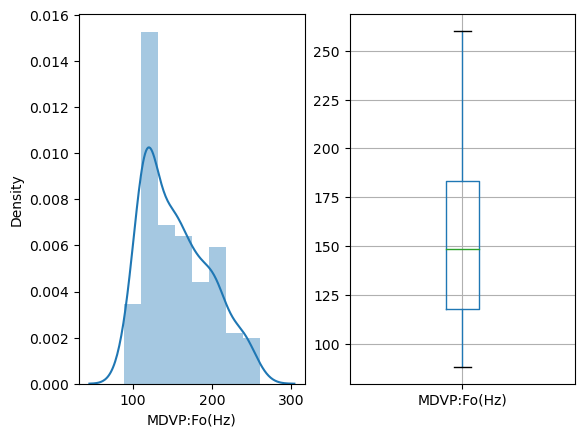

<Figure size 4000x1000 with 0 Axes>

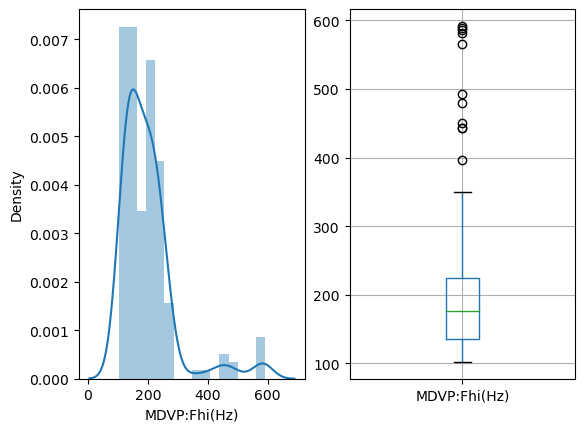

<Figure size 4000x1000 with 0 Axes>

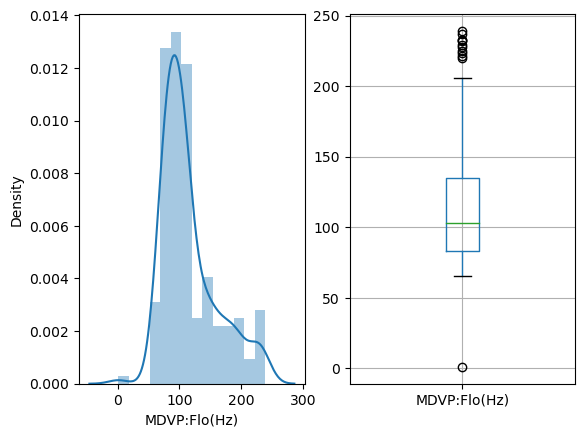

<Figure size 4000x1000 with 0 Axes>

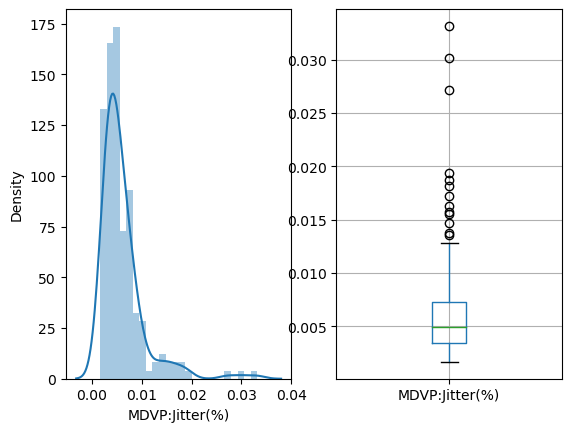

<Figure size 4000x1000 with 0 Axes>

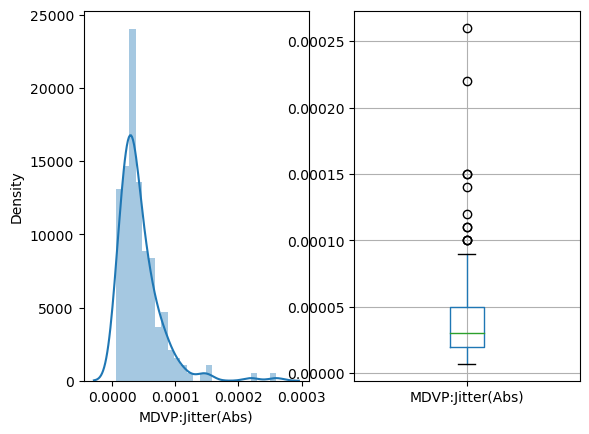

<Figure size 4000x1000 with 0 Axes>

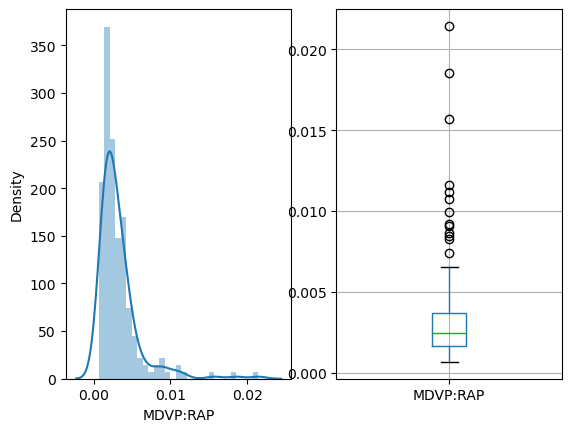

<Figure size 4000x1000 with 0 Axes>

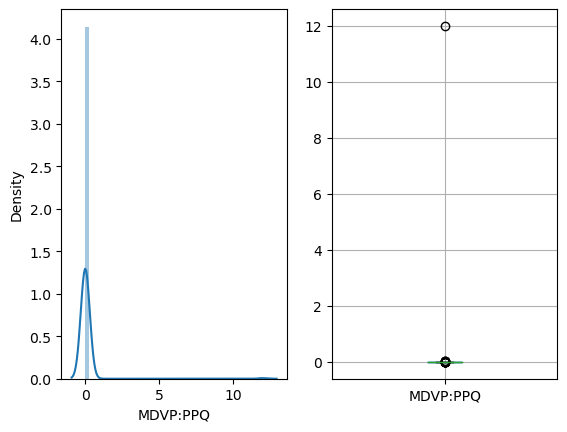

<Figure size 4000x1000 with 0 Axes>

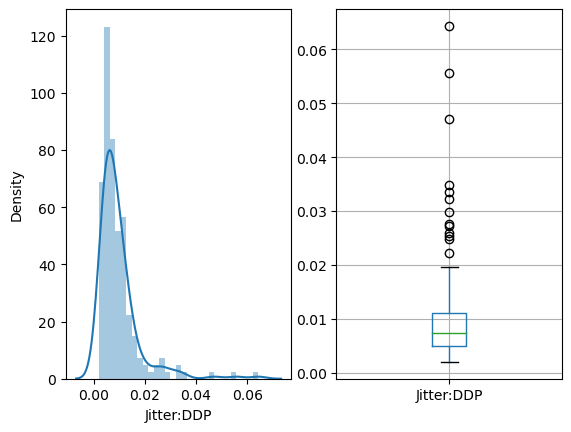

<Figure size 4000x1000 with 0 Axes>

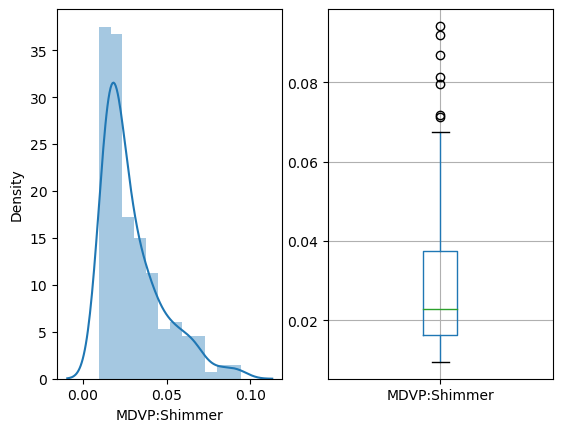

<Figure size 4000x1000 with 0 Axes>

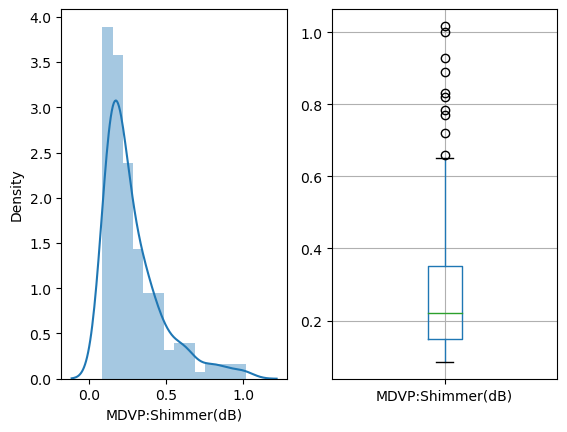

<Figure size 4000x1000 with 0 Axes>

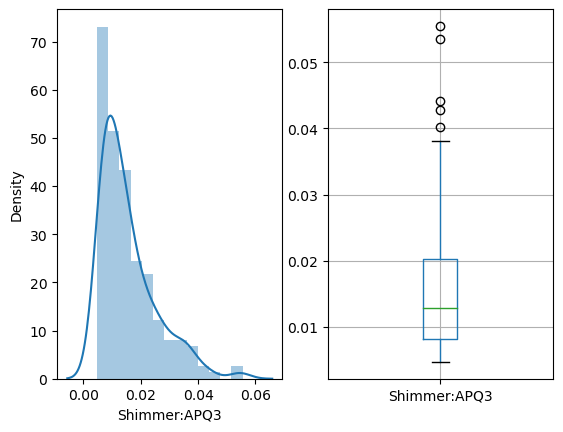

<Figure size 4000x1000 with 0 Axes>

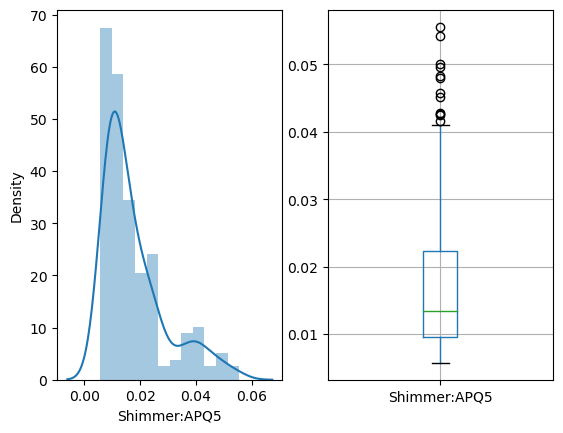

<Figure size 4000x1000 with 0 Axes>

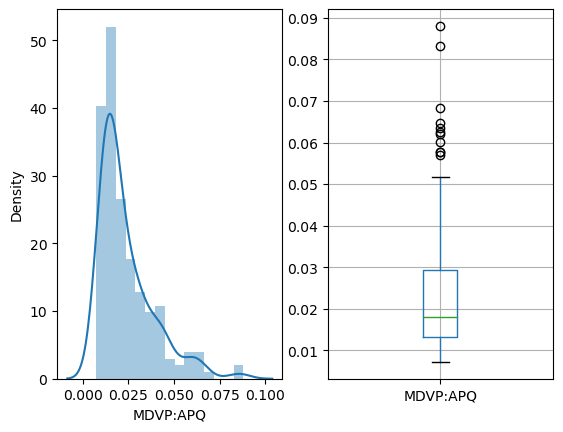

<Figure size 4000x1000 with 0 Axes>

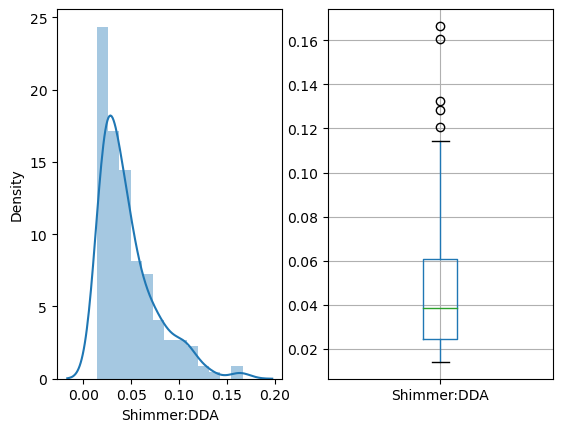

<Figure size 4000x1000 with 0 Axes>

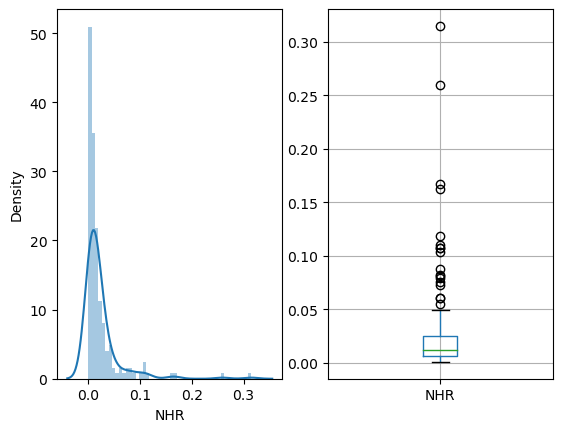

<Figure size 4000x1000 with 0 Axes>

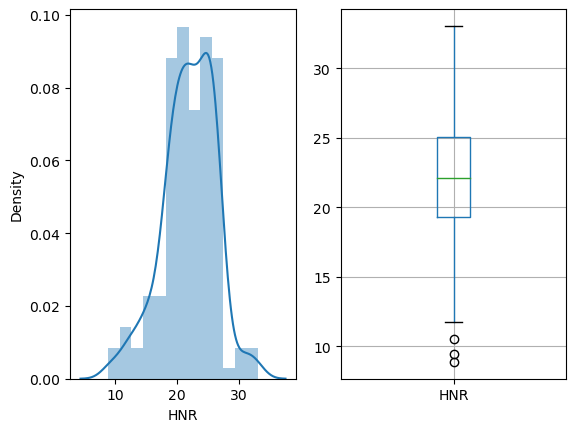

<Figure size 4000x1000 with 0 Axes>

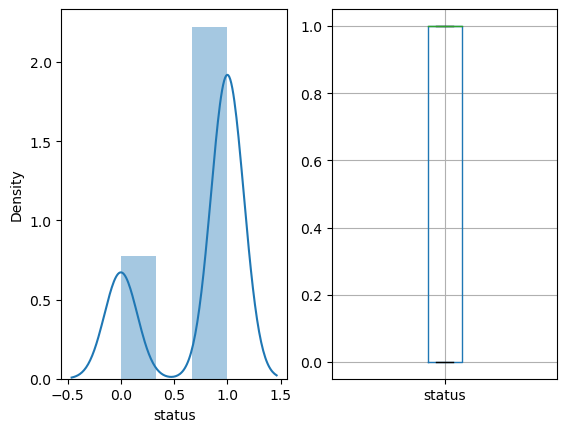

<Figure size 4000x1000 with 0 Axes>

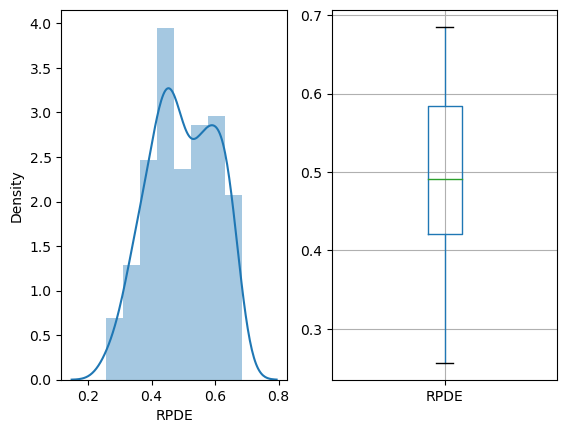

<Figure size 4000x1000 with 0 Axes>

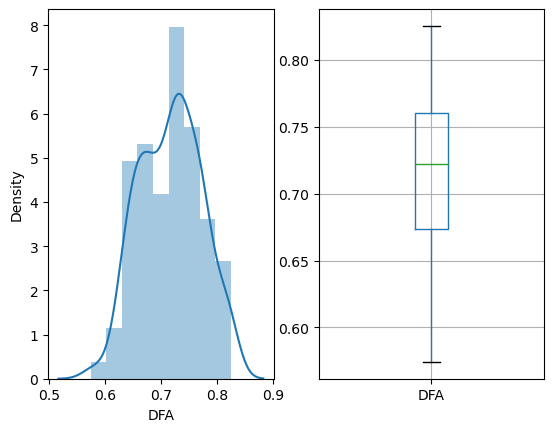

<Figure size 4000x1000 with 0 Axes>

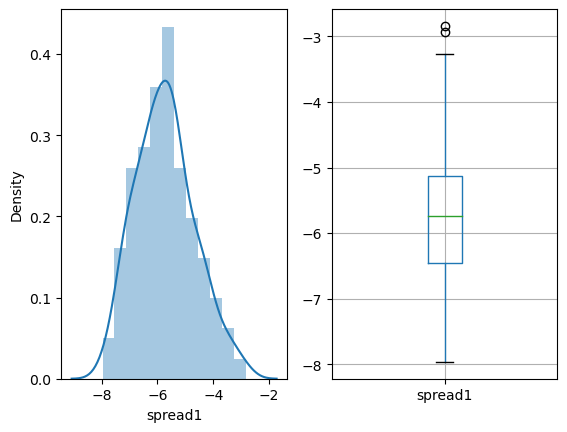

<Figure size 4000x1000 with 0 Axes>

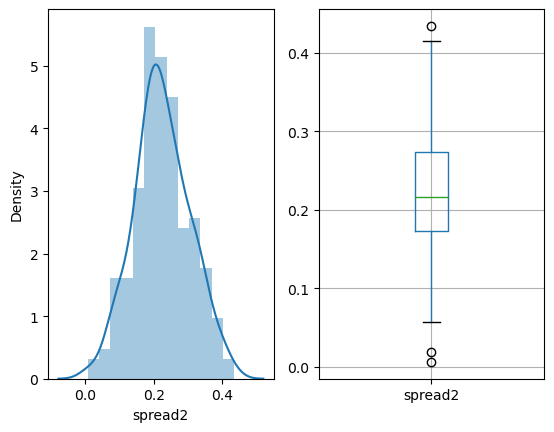

<Figure size 4000x1000 with 0 Axes>

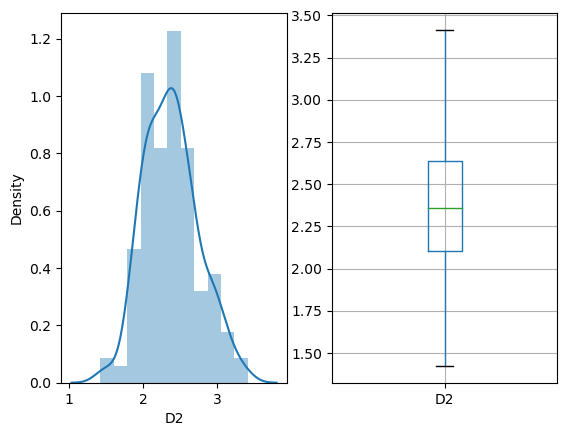

<Figure size 4000x1000 with 0 Axes>

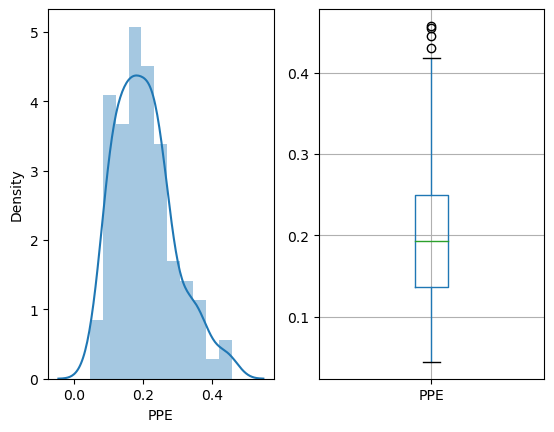

<Figure size 4000x1000 with 0 Axes>

In [34]:
# Plot the histograms and boxplots to see the outliers for all numerical variable 
for feature in feature_list:
    plot_distribution(df_outliers, feature)

### Hence Outliers are almost removed

# 4. Categorical Data

In [35]:
df_outliers.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [38]:
# Lets find out the count of unique variables in each variable
df = df_outliers
unique_value_counts = {}
for column in df.columns:
    unique_count = df[column].nunique()
    unique_value_counts[column] = unique_count
    
unique_value_counts

{'name': 189,
 'MDVP:Fo(Hz)': 189,
 'MDVP:Fhi(Hz)': 189,
 'MDVP:Flo(Hz)': 189,
 'MDVP:Jitter(%)': 168,
 'MDVP:Jitter(Abs)': 18,
 'MDVP:RAP': 149,
 'MDVP:PPQ': 162,
 'Jitter:DDP': 174,
 'MDVP:Shimmer': 182,
 'MDVP:Shimmer(dB)': 145,
 'Shimmer:APQ3': 180,
 'Shimmer:APQ5': 183,
 'MDVP:APQ': 183,
 'Shimmer:DDA': 184,
 'NHR': 181,
 'HNR': 189,
 'status': 2,
 'RPDE': 189,
 'DFA': 189,
 'spread1': 189,
 'spread2': 188,
 'D2': 189,
 'PPE': 189}

### There is no categorical value present

### Label Encoding for 'name' column

In [41]:
# count of unique values
len(df_outliers['name'].unique())

189

In [44]:
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df_outliers['name']= label_encoder.fit_transform(df_outliers['name']) 
  
# count of unique values after encoding    
len(df_outliers['name'].unique())

189

In [45]:
df_outliers.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [46]:
# Exporting the cleaned data
df = df_outliers
df.to_csv("cleaned_data.csv", index=False)